In this notebook, I compare the serface of the three objective function. We get the same initial points for the the objective function

In [1]:
import numpy as np
import random
def initial_points(bounds, nums, objective_func):
    #random.seed(0)
    #X_init = np.random.uniform(bounds[:, 0], bounds[:, 1], size=(nums, bounds.shape[0]))
    X_init = np.array([[400]*12])
    Y_init = []
    for x in X_init:
        #print(x)
        Y_init.append(objective_func(x))
    return X_init, np.array(Y_init).reshape(-1, )

In [2]:
def plot_dim(X_init, bounds, plot_dim):
    #point = #np.random.uniform(bounds[:, 0], bounds[:, 1], size=(1, bounds.shape[0]))
    X_new = np.array([X_init[0] for _ in range(80)])
    X_new[:, plot_dim] =  np.linspace(bounds[plot_dim, 0], bounds[plot_dim, 1], num=80, endpoint=True, retstep=False, dtype=None, axis=0)
    return X_new

In [10]:
def plot_the_surface(X_init, bounds, obj):
    plt.figure(figsize = (16,16))
    for t in range(12):
        plt.subplot(4,3,t + 1)
        X_nex = plot_dim(X_init, bounds,t)
        Y_init = []
        for x in X_nex:
            #print(x)
            Y_init.append(obj(x))
        plt.plot(X_nex[:,t], Y_init)
            #print("org", x.shape)

## Objective function with 1e10 penalty

In [8]:
import numpy as np
from sklearn.base import clone
from skopt import gp_minimize
from skopt.learning import GaussianProcessRegressor
from skopt.learning.gaussian_process.kernels import ConstantKernel, Matern,RBF
import matplotlib.pyplot as plt

from objective_function import objective_function_penalty,print_result

In [19]:
def obj_penalty(x):
    return objective_function_penalty(x, days = 300, plotdata = False, penalty = 1e10, target_service_level = 0.8)
bounds = np.array([[20,800] for _ in range(12)])
X_init, Y_init= initial_points(bounds, 1, obj_penalty)

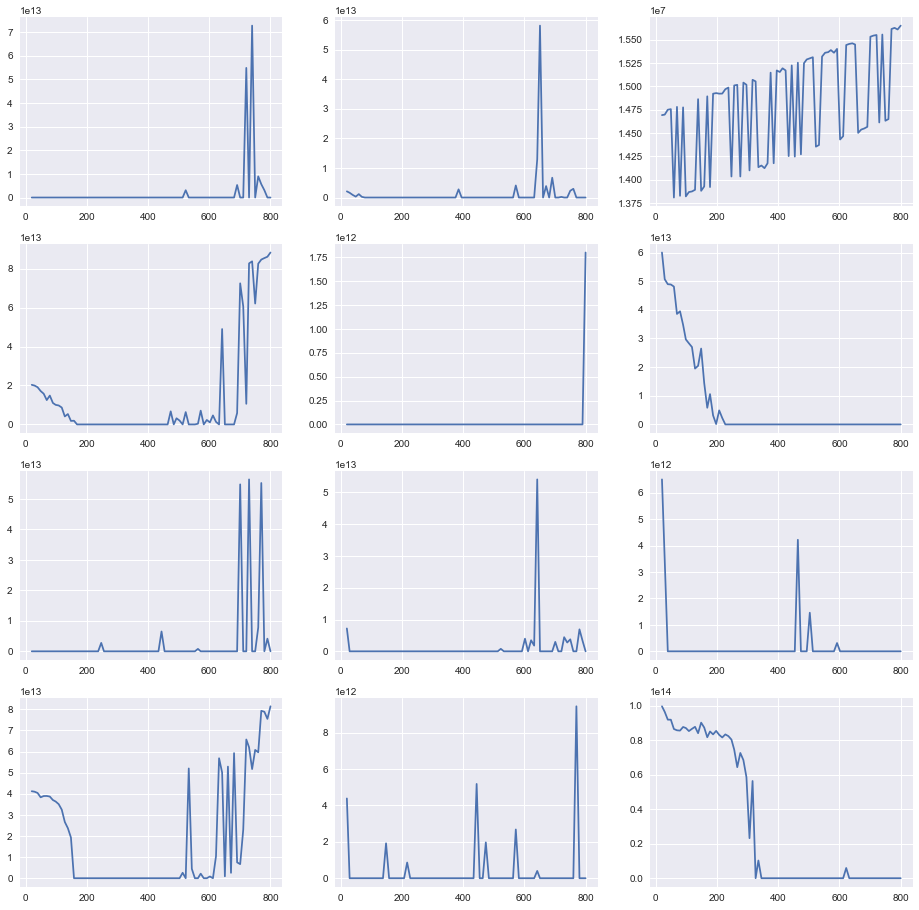

In [21]:
plot_the_surface(X_init, bounds,obj_penalty)

## Objective function only calculating total cost

In [22]:
from objective_function import objective_function

In [23]:
def f_cost(x):
    return objective_function(x, days = 300, plotdata = False, return_SL = False)

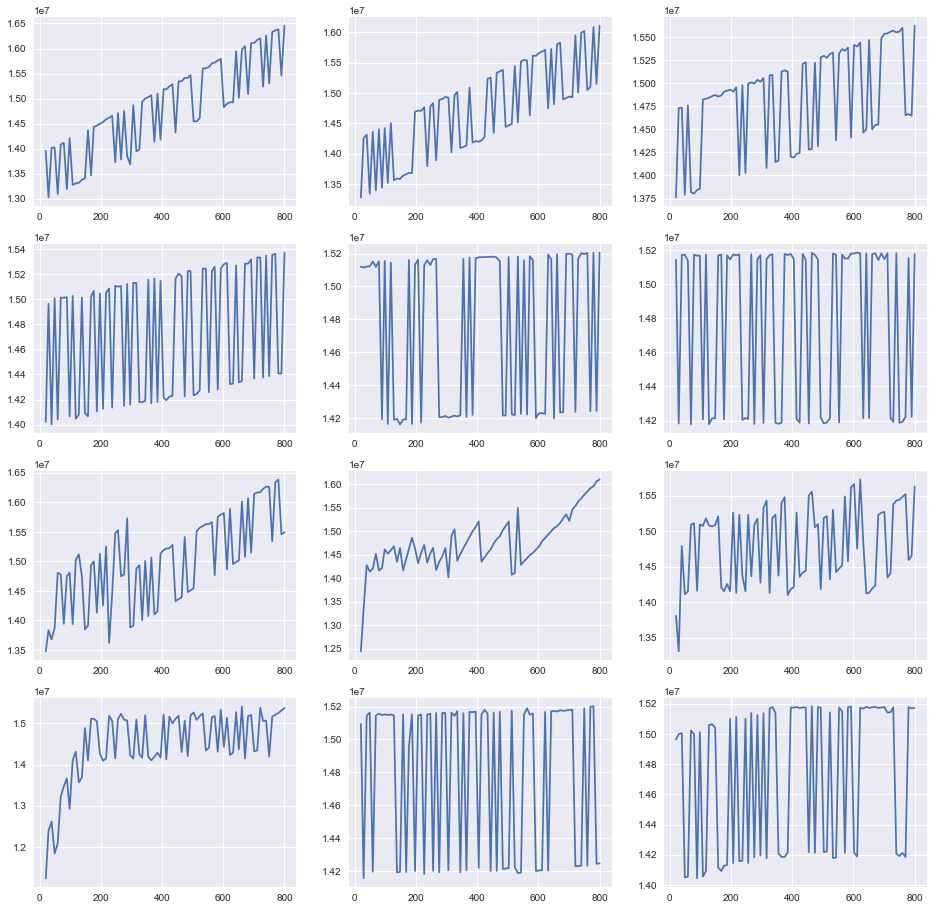

In [24]:
plot_the_surface(X_init, bounds,f_cost)

## Object function only calculated minimum of service level
It is a first order statistic, and in [0, 1]

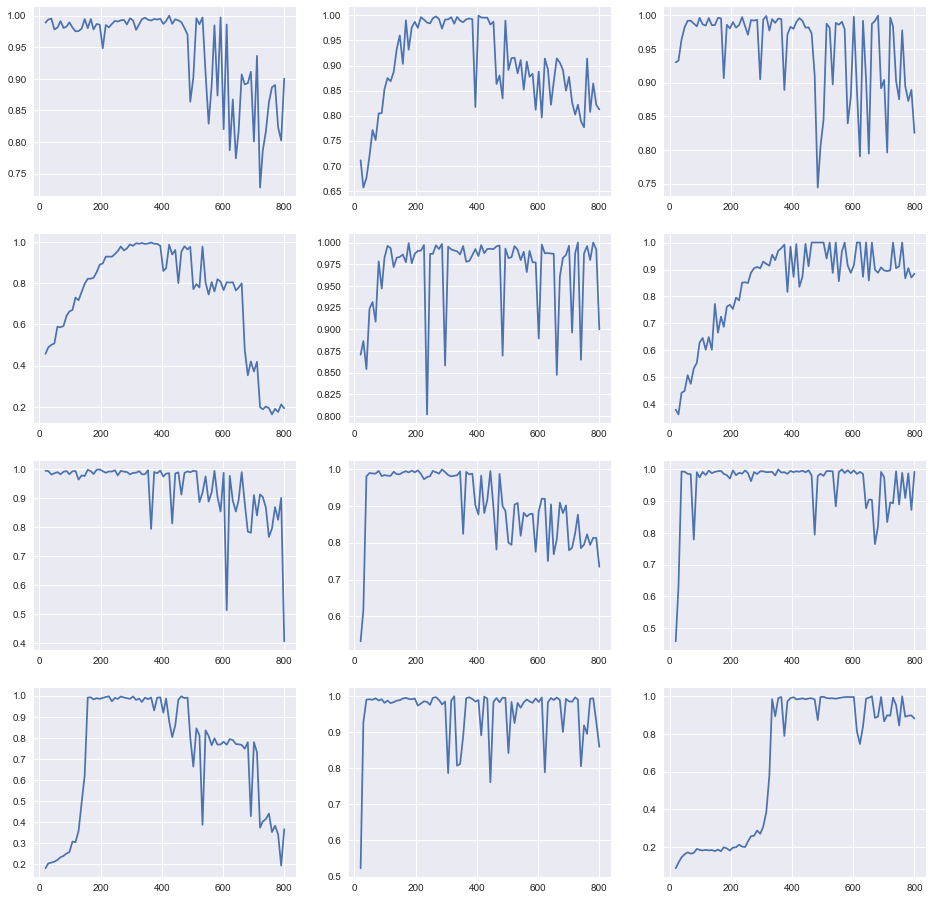

In [25]:
def f_SL(x):
    return objective_function(x, days = 300, plotdata = False, return_SL = True)

plot_the_surface(X_init, bounds,f_SL)

## objective function for service level for each products

In [93]:
def plot_the_surface_2(X_init, bounds, obj):
    plt.figure(figsize = (16,16))
    for t in range(12):
        plt.subplot(4,3,t + 1)
        X_nex = plot_dim(X_init, bounds,t)
        
        Y_init = np.array([0]* 6)
        for x in X_nex:
            #print(Y_init)
            #print(np.array(obj(x)).shape)
            Y_init = np.vstack((Y_init, np.array(obj(x))))
            
        #print(Y_init)
        for j in range(6):
            plt.plot(X_nex[:,t], Y_init[1:,j])
            #print("org", x.shape)

In [73]:
import numpy as np
from sklearn.base import clone
from skopt import gp_minimize
from skopt.learning import GaussianProcessRegressor
from skopt.learning.gaussian_process.kernels import ConstantKernel, Matern,RBF
import matplotlib.pyplot as plt

from objective_function import objective_function_products

In [66]:
def f_product(x):
    return objective_function_products(x, days = 300, plotdata = False, return_SL = True)
bounds = np.array([[20,800] for _ in range(12)])
X_init = np.array([[400] * 12])

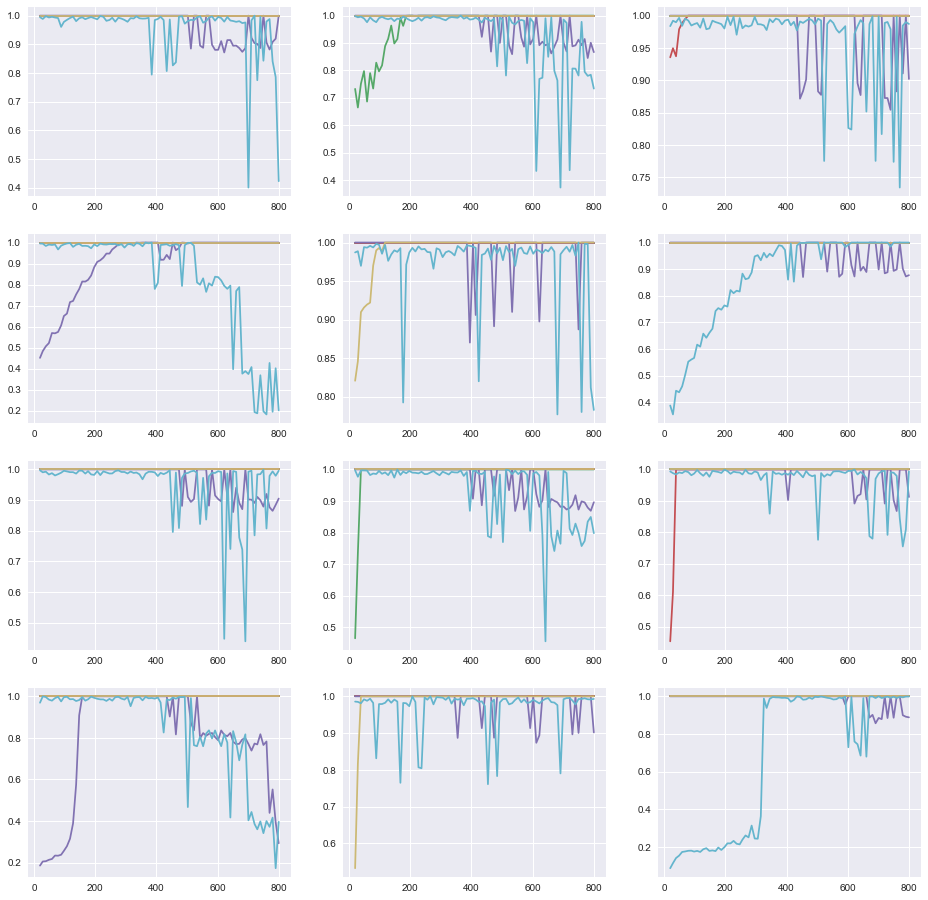

In [94]:
plot_the_surface_2(X_init, bounds, f_product)